## Convnets

As we have seen so far, neural networks and other ml models work on 1-d data.
We are summarizing the properties of the training examples in 1-dim vectors. 
The summarisation process and what kind of functions/transformations are used to generate this 1d vector is typicall called feature engineering.


This was a typical practice in problems where the inputs were 2 or even higher in dimentionallity, such as images. Images are typically an xy grid of intensity values, with 1 channel when we are talking about grayscale images or 3 channels (R, G, B) in the case of color images. 

Thus, in the grayscale scenario an input image would be 1xWxH, and in the color case 3xWxH 


Convnets are neural network architectures that operate directly images, in a very similar fashion as neural networks. The feature engineering part however here, is to be learned directly from data as we will see in the following discussion about the convolution operation.


## a small detour on images 

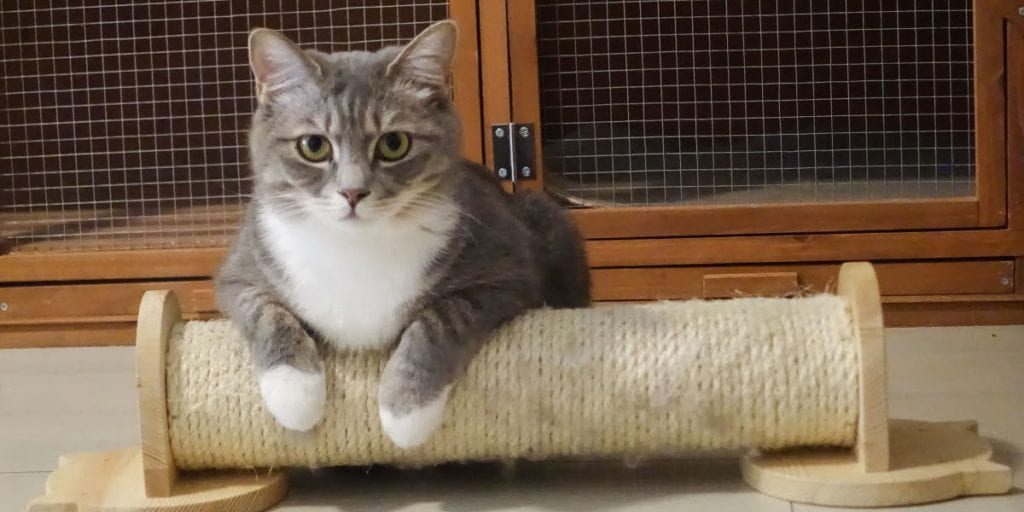

In [218]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("images/cat.jpg")

im

## image in RGB channels 

In [219]:
img  = np.array(im)
 
img[0:10,0:10,0]
 

array([[60, 74, 48, 33, 38, 33, 35, 40, 36, 36],
       [54, 71, 48, 34, 39, 34, 34, 37, 36, 36],
       [47, 67, 48, 34, 39, 34, 33, 34, 36, 36],
       [43, 65, 47, 32, 36, 33, 34, 35, 36, 36],
       [43, 66, 47, 29, 32, 32, 35, 37, 36, 36],
       [43, 69, 49, 29, 31, 32, 36, 38, 36, 36],
       [41, 70, 53, 33, 34, 34, 36, 36, 36, 36],
       [39, 71, 57, 36, 37, 35, 36, 33, 36, 36],
       [46, 61, 58, 43, 39, 40, 35, 30, 33, 33],
       [44, 61, 59, 41, 33, 35, 36, 38, 27, 27]], dtype=uint8)

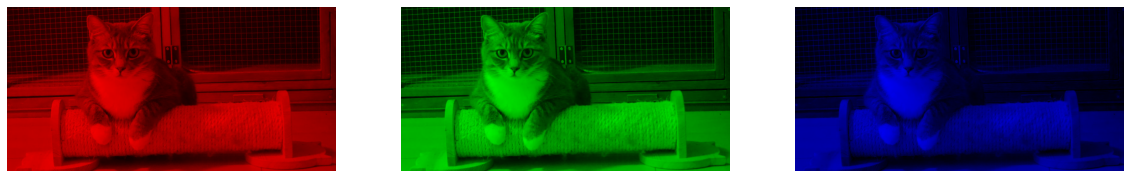

In [220]:
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(20,20))
 
for i, subplot in zip(range(3), plots):
    temp = np.zeros(img.shape, dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

## Convolutions


The idea behind convolutions is that we want to summarise the input images with some operator, which will act as a feature generator. We apply multiple operators and we get a deep stacked representation of the original image.


This is done by using a nxn square matrix (the filter) which we slide pixel by pixel on the original image.

We then take the dot product of the image and the filter. Filter weights are randomly initialized and act as weights/learnable parameters. The hope is that different filters will learn different properties of the input images.


<img src="./images/conv_1.gif" width="400" align="center"> 
<img src="./images/conv_2.gif" width="400" align="center"> 

In [195]:
import numpy as np 
import torch
from torch.nn import Conv2d

In [196]:

X = np.ones( (10,10)).astype(np.float32)
w = np.random.randn( 9 ).reshape(3,3).astype(np.float32)
X

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [197]:
w

array([[ 0.39159176,  2.3949764 , -1.1151359 ],
       [-1.2735841 ,  1.9949352 ,  0.20295192],
       [ 0.91779804, -0.5444024 ,  0.2736141 ]], dtype=float32)

In [198]:
v1 = X[0:3, 0:3].ravel()
v2 = w.ravel()
v1.dot(v2)

3.242745

In [199]:
conv1 = Conv2d(1,1, kernel_size=(3,3), bias = False)
conv1.weight.shape

## use the weights from the w above
conv1.weight = torch.nn.Parameter(torch.from_numpy(w.reshape(1,1,3,3)))
ret = conv1( torch.from_numpy(X.reshape(1, 1, 10,10)))
ret[0][0][0]

tensor([3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
       grad_fn=<SelectBackward>)

In [200]:
ret[0][0]

tensor([[3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427],
        [3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427, 3.2427]],
       grad_fn=<SelectBackward>)

In [210]:
t = torch.from_numpy(img.astype(np.float32)).transpose( 0, 2).unsqueeze(0)
t.shape

torch.Size([1, 3, 1024, 512])

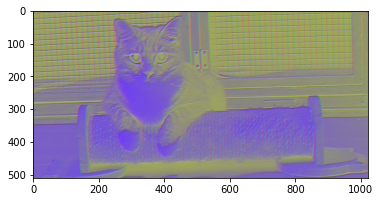

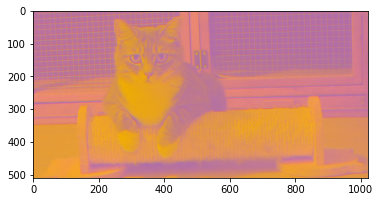

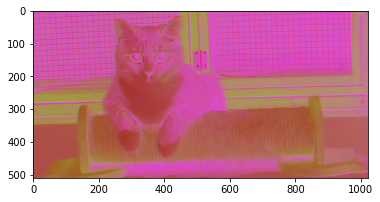

In [214]:
for i in range(3):
    conv1 = Conv2d(3,3, kernel_size=(3,3), bias = True)
    ret = conv1( t )
    new_img = ret.squeeze(0).transpose(0,2).detach().numpy()
    new_img -= new_img.min()
    new_img /= new_img.max()
    plt.imshow(new_img)
    plt.show()

We see that each randomly initialized convolution filter looks like some image processing function, eg edge detection. 

So, the architecture for a traditional neural network is similar to the following

<img src="./images/neural_net2.jpeg" width="400" align="center"> 


whereas in the CNN case it looks like the following:


<img src="./images/cnn.jpeg" width="400" align="center"> 


In [223]:
img.shape, new_img.shape

((512, 1024, 3), (510, 1022, 3))

The convolution operator as it has been described above will reduce the input size.
For example, if we apply a 3x3 convolution on the image 512x1024x3 image above we will get as output an image of 510x1022x3 as it removes one pixel from left, right, top and bottom.

### Padding
If we want to preserve the dimentions of the image, we are using padding, eg fill the boundary pixels with zeros. 



### Stride


We can also skip rows and columns when we are sliding the filter in the original image. The number of colums and rows we are skipping is called stride. 


<img src="images/stride.png">





We can compute the spatial size of the output volume as a function of the input volume size (W), the receptive field size of the Conv Layer neurons (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. You can convince yourself that the correct formula for calculating how many neurons “fit” is given by $(W−F+2P)/S+1$. For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output.



### Pooling



<img src="images/MaxpoolSample2.png">

Here, we are moving a sliding window again in the input layer and instead of dot product we are performing usually a max operator

Accepts a volume of size W1×H1×D1

Requires two hyperparameters:
    - their spatial extent F,
    - the stride S,

Produces a volume of size W2×H2×D2 where:
    - W2=(W1−F)/S+1
    - H2=(H1−F)/S+1
    - D2=D1





In order to build a deep CNN, we are repeating the process of stacking conv, max pool and relu blocks.
At the last layer, just before the activation layer, we are transforming the last conv output in a typicall hidden layer, as we have seen in the vanilla neural networks.



For example if our last conv block is 16x16x64, we are unrolling this volume into a 32768 length vector and following that we some times insert another fully connected hidden layer before the output of the network.





<img src="images/cnn2.png">


Alexnet architecture which won the ImageNet competition in 2012 was similar to this :


<img src="images/alexnet.png">
